In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [42]:
dataset = pd.DataFrame(df.data)

In [43]:
dataset.columns = df.feature_names

In [44]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [45]:
## independent feature and dependent feature
x=dataset
y=df.target

In [46]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [47]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [48]:
## train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [49]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
x_test=scaler.fit_transform(x_test)

In [53]:
x_test=scaler.transform(x_test)

/home/rhythm/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [55]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [56]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=50)

In [57]:
np.mean(mse)

-0.5254690554808524

In [58]:
##prediction 
reg_pred=regression.predict(x_test)

/home/rhythm/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
reg_pred

array([-58.76152123, -58.06262503, -57.86374386, ..., -58.27445371,
       -58.35191431, -58.48765494])

/home/rhythm/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


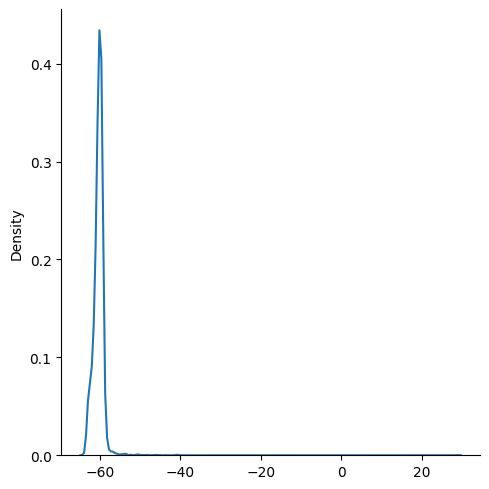

In [60]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [61]:
from sklearn.metrics import r2_score

In [62]:
score=r2_score(reg_pred,y_test)

In [63]:
score

-1791.570659424142

## Ridge Regression Algorithm


In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [65]:
ridge_regressor=Ridge()

In [66]:
ridge_regressor


Ridge()

In [67]:
parameters={'alpha':[1,2,3,10,20,30,40,50]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [68]:
print(ridgecv.best_params_)

{'alpha': 1}


In [69]:
print(ridgecv.best_score_)

-0.5268263170917394


In [71]:
ridge_pred=ridgecv.predict(x_test)

/home/rhythm/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


/home/rhythm/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


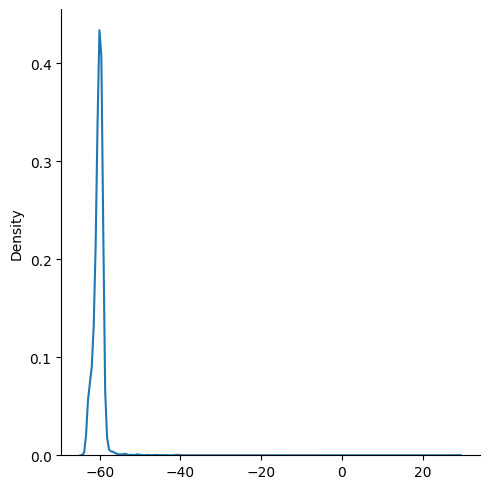

In [72]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [73]:
score=r2_score(ridge_pred,y_test)

In [74]:
score

-1799.742870711915

In [75]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [76]:
lasso=Lasso()

In [78]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [79]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-0.954264113746258


In [81]:
lasso_pred=lassocv.predict(x_test)

/home/rhythm/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


/home/rhythm/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


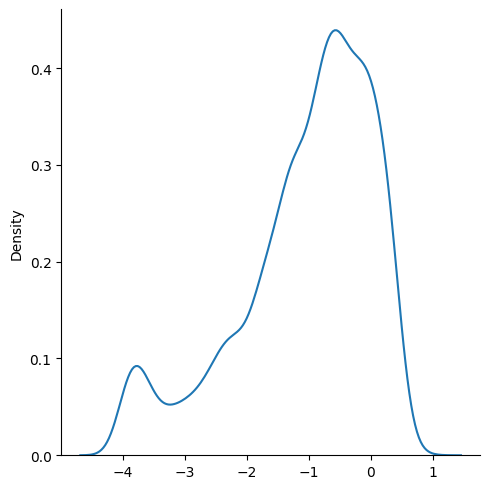

In [82]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')